<a href="https://colab.research.google.com/github/sforshreya/ML/blob/main/ML_Module_Test_(Team_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [ ]:
#Importing Dataset
Dataset = pd.read_csv("/content/drive/MyDrive/ML/ML-Team8-Module Test/Leads.csv")
Dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#Assigning dataset to new name for safer side
df=Dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#Checking shape of dataset
df.shape

(9240, 37)

In [ ]:
#Checking for columns names, non null values in each columns, datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#Missing Value Handling

In [ ]:
#Here we see that in many columns we have 'Select' as value, which is option not selected , so we will replace with 'NAN'
df= df.replace('Select', np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##Replacing null values 


Drop data:

        a. Drop the whole row

        b. Drop the whole column
 
Replace data

        a. Replace it by mean
        
        b. Replace it by frequency
        
        c. Replace it based on other functions

In [ ]:
#Checking null values in each rows

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###Columns with null values
Lead Source                                        36

TotalVisits                                       137

Lead Profile                                     2709

City                                             1420

Asymmetrique Activity Index                      4218

Asymmetrique Profile Index                       4218

Asymmetrique Activity Score                      4218

Asymmetrique Profile Score                       4218

Page Views Per Visit                              137

Last Activity                                     103

Country                                          2461

Specialization                                   1438

How did you hear about X Education               2207

What is your current occupation                  2690

What matters most to you in choosing a course    2709

In [ ]:
# % of null value
round(100*(df.isnull().sum())/len(df.index),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [ ]:
#Will drop the columns with more that 45% null values
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum())/len(df.index),2)>70.00)].columns, 1)

In [ ]:
#Will also remove columns with null value % of 45%
# Asymmetrique Activity Index  |
# Asymmetrique Profile Score   \
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile

df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],axis=1,inplace=True)

In [ ]:
df.shape

(9240, 31)

In [ ]:
# % of null value
null_perc=round(100*(df.isnull().sum())/len(df.index),2)
null_perc

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [ ]:
#We will create new Df of columns with null values
cols_with_nonull=([null_perc[null_perc ==0].index])
cols_with_nonull

[Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Do Not Email',
        'Do Not Call', 'Converted', 'Total Time Spent on Website', 'Search',
        'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview', 'Last Notable Activity'],
       dtype='object')]

In [ ]:
#checking the columns having null values
df_with_null=df.drop(labels=cols_with_nonull[0],axis=1)
df_with_null

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City
0,Olark Chat,0.0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,NaN
1,Organic Search,5.0,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,NaN
2,Direct Traffic,2.0,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai
3,Direct Traffic,1.0,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai
4,Google,2.0,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
9235,Direct Traffic,8.0,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,High in Relevance,Mumbai
9236,Direct Traffic,2.0,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Might be,Mumbai
9237,Direct Traffic,2.0,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,invalid number,Not Sure,Mumbai
9238,Google,3.0,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,NaN,NaN,Other Metro Cities


In [ ]:
# Checking the unique values and its count w.r.t other unique values in columns with null values

for col in df_with_null.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(df_with_null[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Last Activity
_________________________________________________________________________________________________
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64
_________________________________________________________________________________________________
Country
_________________________________________________

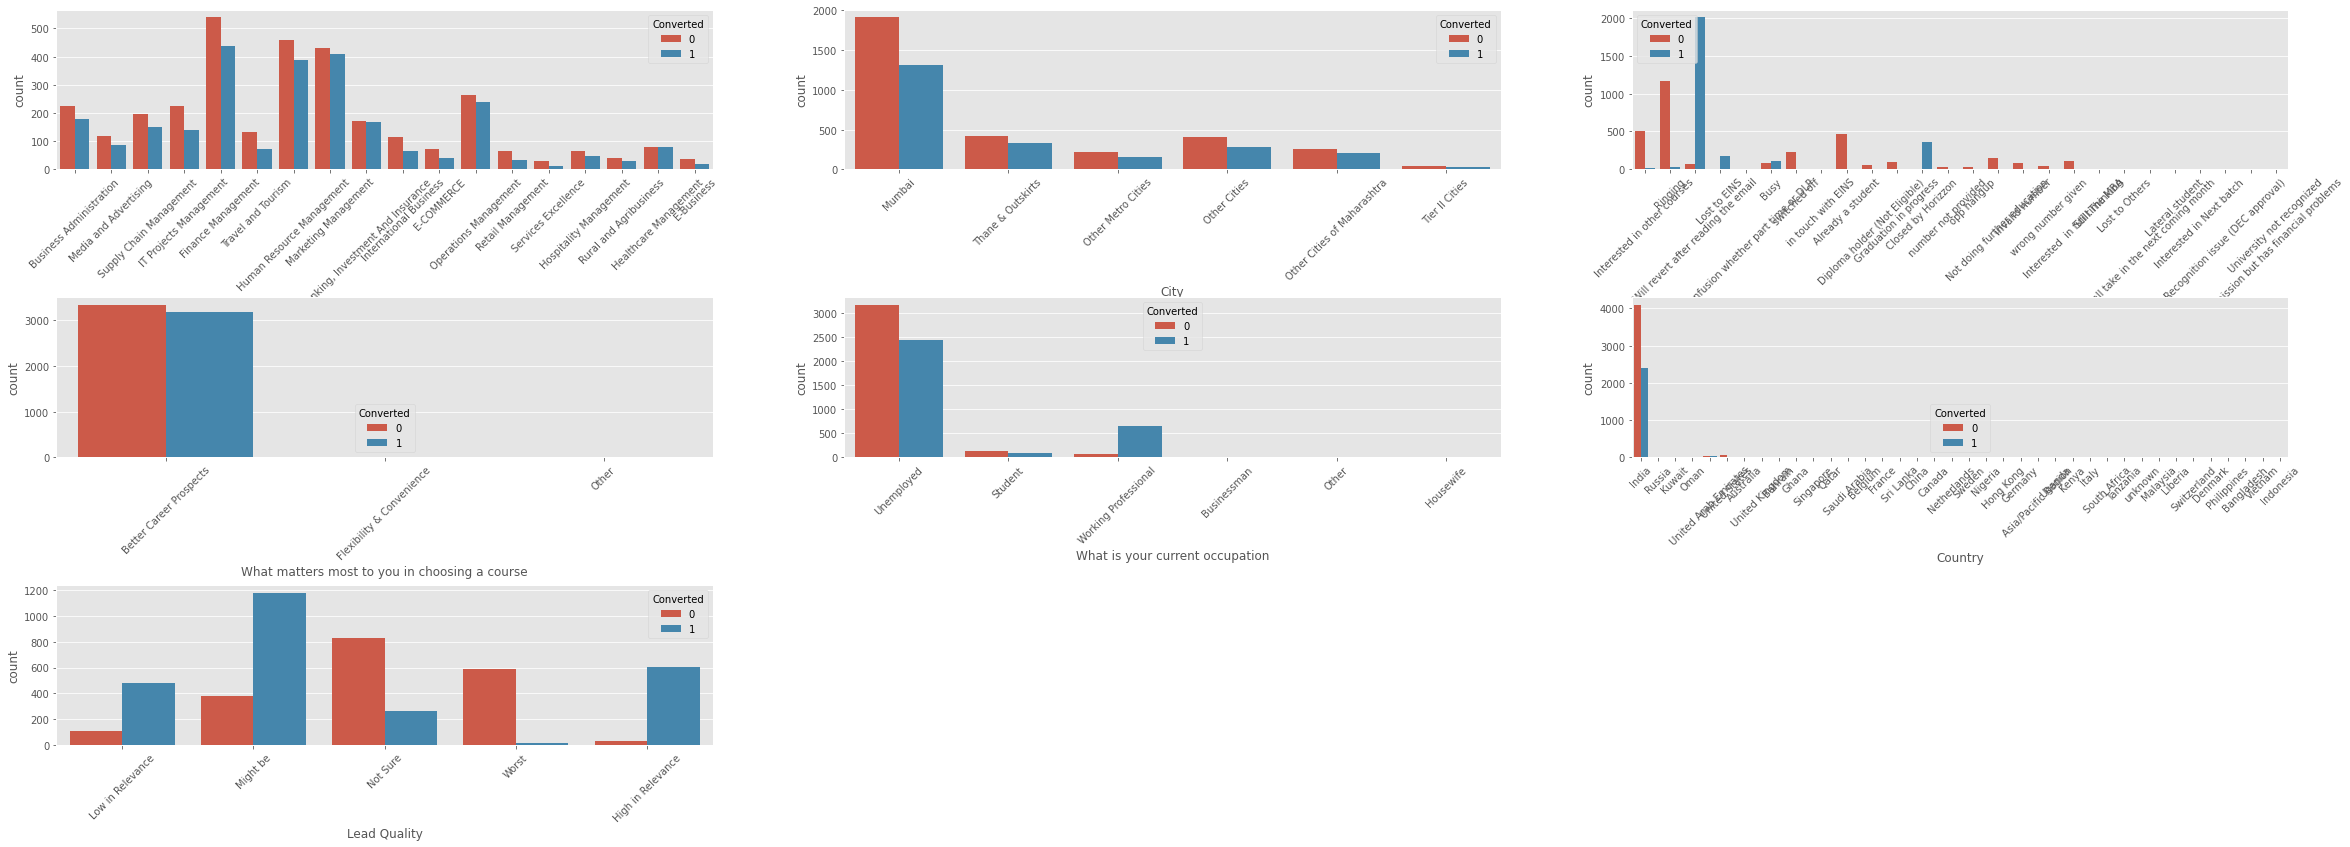

In [ ]:
features = ['Specialization','City','Tags','What matters most to you in choosing a course','What is your current occupation','Country','Lead Quality']
plt.figure(figsize = (40, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(8,3, i[0]+1)
    sns.countplot(x = i[1], hue = 'Converted', data = df)
    plt.xticks(rotation = 45)

In [ ]:
#In specilization 24% values are 'Select/not filled' so we can replace it with 'Not Sure' as no there value is dominant enough to be replaced
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Sure')

# We can put MUMBAI into all the NULLs as most of the values belong to MUMBAI (41%)
df['City'] = df['City'].replace(np.nan, 'Mumbai')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with same
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with same
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with the 'India'
df['Country'] = df['Country'].replace(np.nan, 'India')

#Lead Quality is important parameter so we will replace with 'Not Sure'
df['Lead Quality'] = df['Lead Quality'].replace(np.nan,'Not Sure')

In [ ]:
# Checking missing data percentage in the updated dataframe

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [ ]:
df[['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']].describe(include='all')

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity
count,9204,9103.000000,9103.000000,9137
unique,21,NaN,NaN,17
top,Google,NaN,NaN,Email Opened
freq,2868,NaN,NaN,3437
mean,NaN,3.445238,2.362820,NaN
std,NaN,4.854853,2.161418,NaN
min,NaN,0.000000,0.000000,NaN
25%,NaN,1.000000,1.000000,NaN
50%,NaN,3.000000,2.000000,NaN
75%,NaN,5.000000,3.000000,NaN


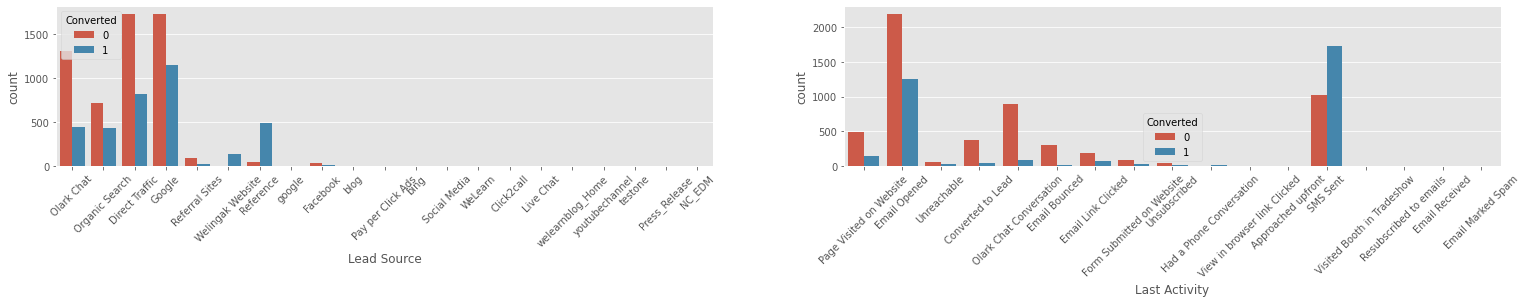

In [ ]:
features = ['Lead Source','Last Activity']
plt.figure(figsize = (40, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(8,3, i[0]+1)
    sns.countplot(x = i[1], hue = 'Converted', data = df)
    plt.xticks(rotation = 45)

In [ ]:
#now will replace the leftover columns null values with refernece to centeral tendency from above describe function, as there null count is very less

df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

df['TotalVisits'] = df['TotalVisits'].replace(np.nan,df['TotalVisits'].mean())

df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].mean())

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

In [ ]:
#will check for null values one more time to to see if data is clean
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

##Here we see that all the columns are having 0 null values now so our data is clean 

In [ ]:
#checking duplicates in Prospect ID and Lead Number
print("Prospect ID duplicate row count if zero: ", sum( df.duplicated(subset = 'Prospect ID')) == 0)

print("Lead Number duplicate row count if zero: ", sum( df.duplicated(subset = 'Lead Number')) == 0)


Prospect ID duplicate row count if zero:  True
Lead Number duplicate row count if zero:  True


# Prospect ID and Lead Number have all unique value as it is identical number for each customer, so we can not make any conclustion based on this so  will delete this 2 columns

In [ ]:
#will drop both the columns
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#Exploratory Data Analysis

In [ ]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


##Converted

In [ ]:
# will check the target variable first 
df["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [ ]:
a=df["Converted"].value_counts()
a

0    5679
1    3561
Name: Converted, dtype: int64

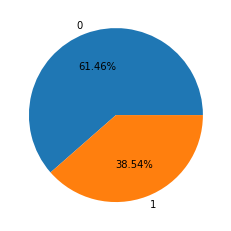

In [ ]:
plt.pie(x=a, labels=a.index, autopct='%1.2f%%')

plt.show()

We have good representation of both the classes of data and hence we are good to go with the further analysis

#Continuous Variable

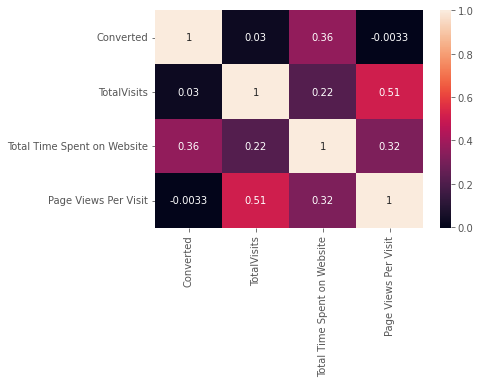

In [ ]:
#will check for the corrilation between the continuous variables
sns.heatmap(df.corr(),annot=True)

###TotalVisits and Page Views Per Visit show max corrilation w.r.t to other continues variables so will go check that first

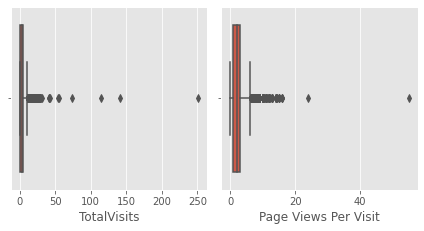

In [ ]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

In [ ]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 
#q1 and q2 here represent 95 percetile values i.e outilers for TotalVisits and Page Views Per Visit resp.
q1 = df["TotalVisits"].quantile(0.95)
df["TotalVisits"][df["TotalVisits"] >= q1] = q1


q2 = df["Page Views Per Visit"].quantile(0.95)
df["Page Views Per Visit"][df["Page Views Per Visit"] >= q2] = q2

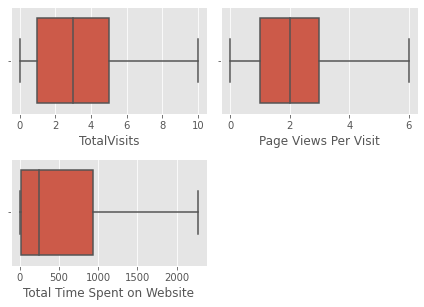

In [ ]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Page Views Per Visit","Total Time Spent on Website"]):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

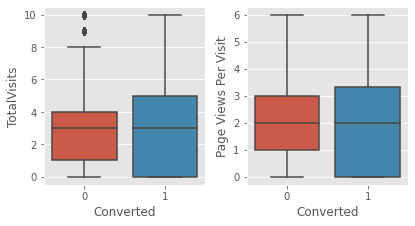

In [ ]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = df)
    plt.tight_layout()

"TotalVisits", "Page Views Per Visit" showing similer realtion to covertaed so we can say they have high multi-collinearity between them so we can drop either of it
 

In [ ]:
#will drop Page Views Per Visit
df.drop(['Page Views Per Visit'], axis=1, inplace=True)

###Total Time Spent on Website

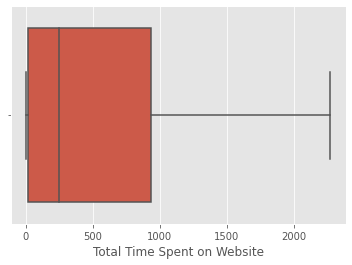

In [ ]:
sns.boxplot(df["Total Time Spent on Website"])

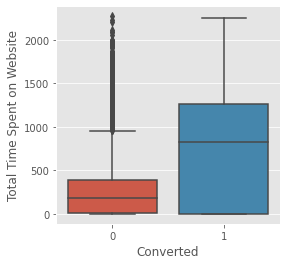

In [ ]:
fig=plt.subplots(figsize=(4, 4))
sns.boxplot(y = "Total Time Spent on Website", x = 'Converted', data = df)


###OBSERVATION:

The median of both the conversion and non-conversion are differ a lot in Time spend on website and hence we can say that Users spending more time on the website are more likely to get converted

Websites can be made more appealing so as to increase the time of the Users on websites

In [ ]:
df.describe(include='all').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#Categorical data

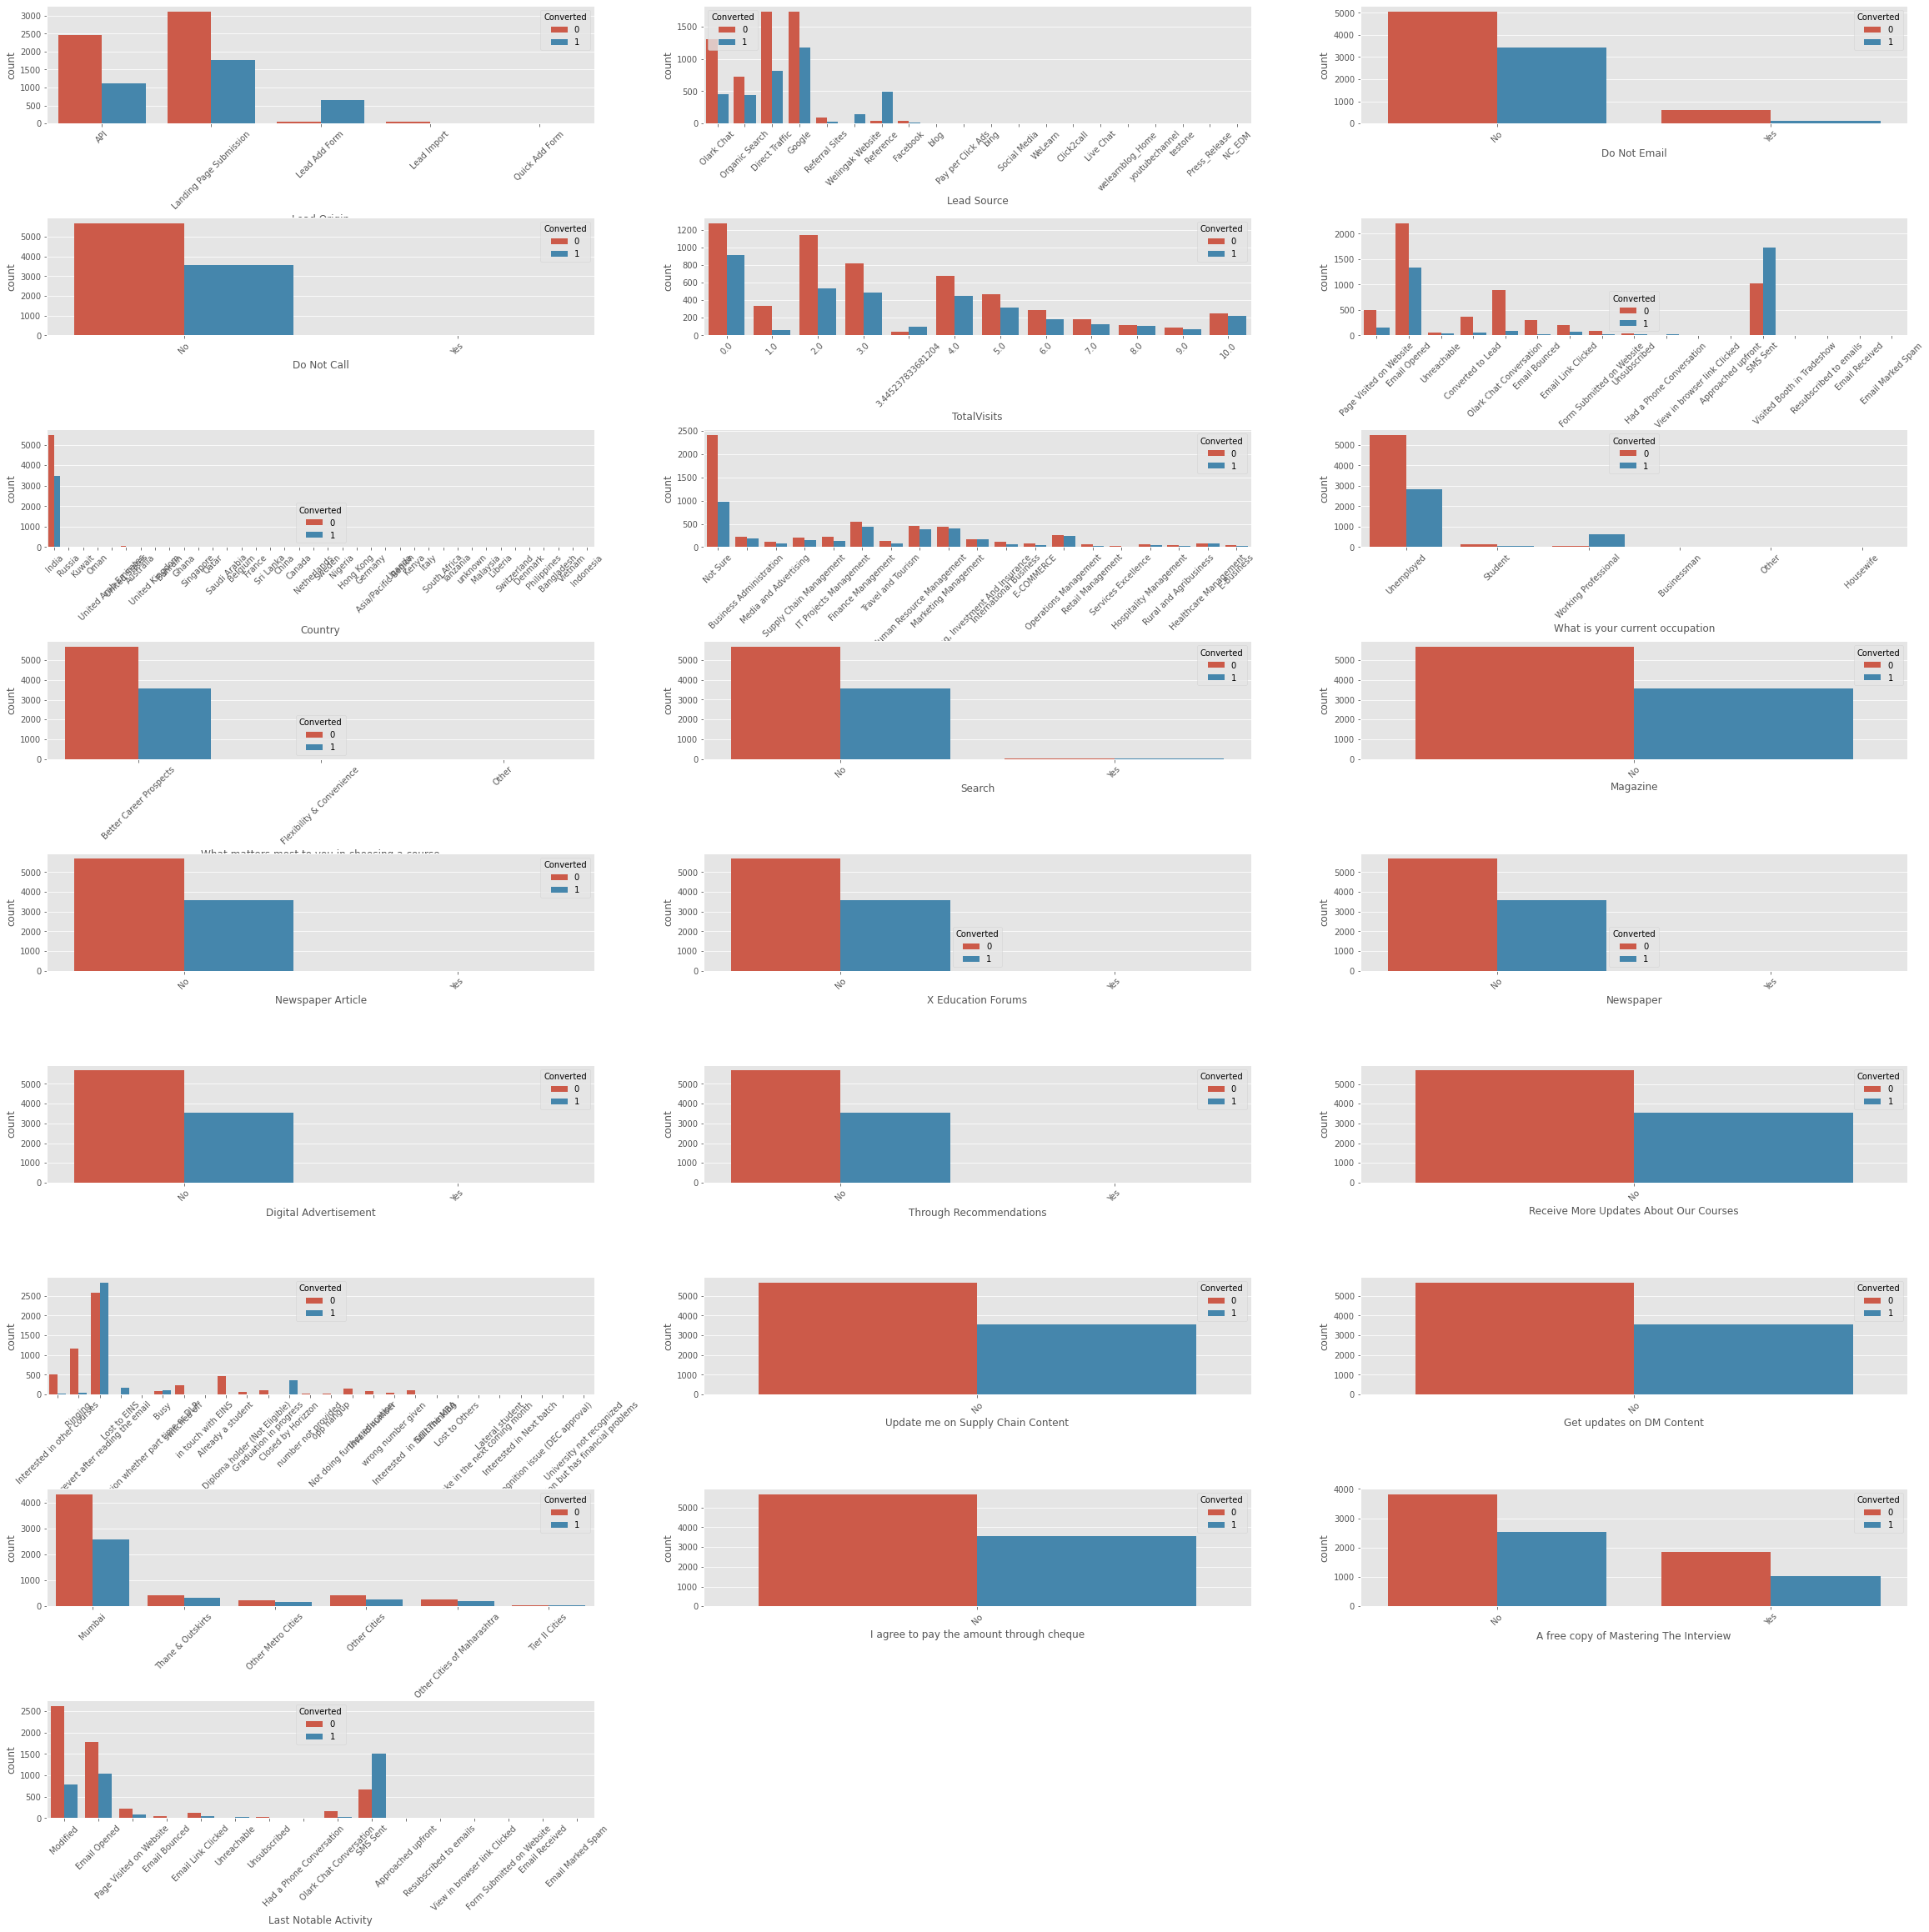

In [ ]:
features = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
plt.figure(figsize = (40, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(9,3, i[0]+1)
    sns.countplot(x = i[1], hue = 'Converted', data = df)
    plt.xticks(rotation = 45)

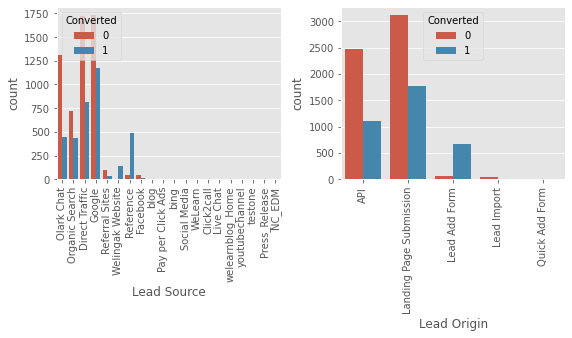

In [ ]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(df[feature], hue=df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

OBSERVATION:

API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
Lead Import has very less count as well as conversion rate and hence can be ignored
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

In [ ]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')



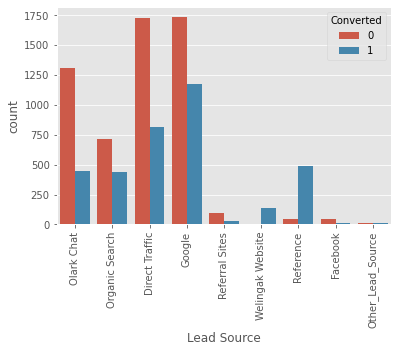

In [ ]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= df)
plt.xticks(rotation='vertical')
plt.show()

OBSERVATION:

The count of leads from the Google and Direct Traffic is maximum
The conversion rate of the leads from Reference and Welingak Website is maximum
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

In [ ]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Other Activity', 'SMS Sent'], dtype=object)

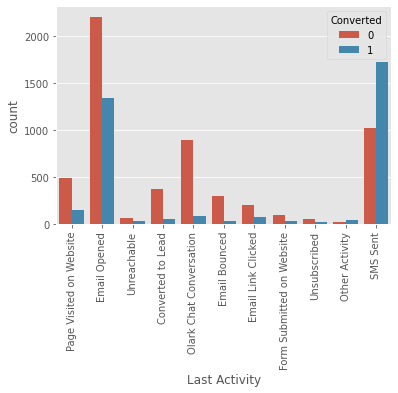

In [ ]:
# Converting all the low count categories to the 'Others' category
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

OBSERVATION:

The count of lst activity as **"Email Opened" is max**

The conversion rate of **SMS sent** as last activity is maximum

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

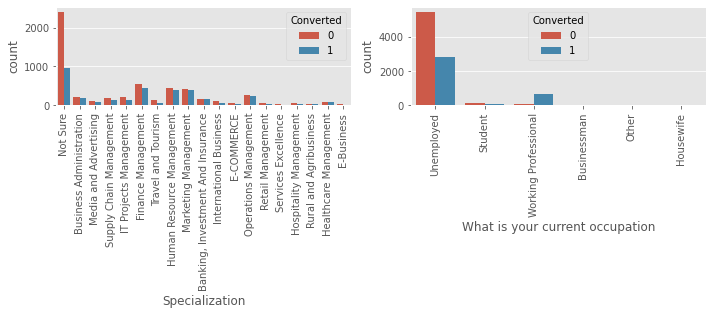

In [ ]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

OBSERVATION:

Looking at above plot, no particular inference can be made for Specialization
Looking at above plot, we can say that working professionals have high conversion rate
Number of Unemployed leads are more than any other category
To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

Country, What matters most to you in choosing a course, City columns have most values corresponding to one value
such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [ ]:
df['What is your current occupation'] = df['What is your current occupation'].replace("Other", 'Other_Occupation')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

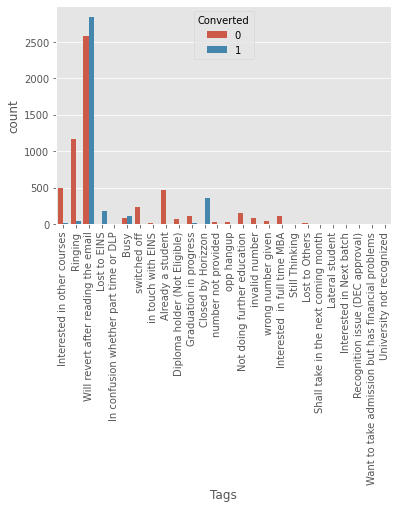

In [ ]:
sns.countplot(x="Tags", hue="Converted", data=df)
plt.xticks( rotation='vertical')
 

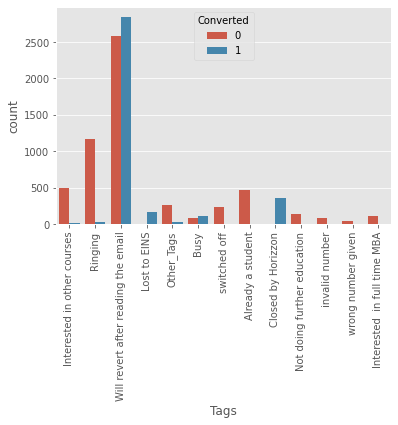

In [ ]:
# Converting all low count categories to Others category
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

OBSERVATION:

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate
SUMMARY:
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

Websites can be made more appealing so as to increase the time of the Users on websites

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [ ]:
df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,2,1,2,2,2,2,2,1,1,1,2
top,No,No,No,No,No,No,No,No,No,No,No
freq,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,6352



OBSERVATION:

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

In [ ]:
# Dropping unnecessary columns

df = df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,Page Visited on Website,Not Sure,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,Email Opened,Not Sure,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,Not Sure,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [ ]:
df.shape

(9240, 13)

In [ ]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)

# getting the cleaned df
final_df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
final_df = pd.concat([final_df, dummies], axis=1)

final_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
final_df.shape

(9240, 98)

In [ ]:
final_df.describe(include='all')

,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.185822,487.698268,0.528788,0.077706,0.005952,0.000108,0.005952,0.314827,0.189935,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.486714,2.761315,548.021466,0.499198,0.267722,0.076926,0.010403,0.076926,0.464472,0.392271,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

final_df[['TotalVisits','Total Time Spent on Website']] = sc.fit_transform(final_df[['TotalVisits','Total Time Spent on Website']])


#Test-Train Split

In [ ]:
# Putting feature variable to X
X = final_df.drop(['Converted'], axis=1)
# Putting response variable to y
y = final_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64


,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,-1.153796,-0.889974,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.657033,0.339972,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.429464,1.905689,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.791630,-0.333396,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.429464,1.715905,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Speci

In [ ]:
#Checking the Conversion Rate

print("Conversion rate is ", (sum(final_df['Converted'])/len(final_df['Converted'].index))*100)

Conversion rate is  38.53896103896104


#Looking at Correlations

In [ ]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = final_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.981709
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.877108
Lead Origin_Lead Add Form              Lead Source_Reference                             0.853237
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.852707
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.842496
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800764
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.692057
Do Not Email_Yes                       Last Activity_Email Bounced                       0.618470
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.584642
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.522885
dtype: float64

In [ ]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

#Model Building

In [ ]:
#Logistic Model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1042,   65],
       [  86,  655]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9182900432900433

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1107
           1       0.91      0.88      0.90       741

    accuracy                           0.92      1848
   macro avg       0.92      0.91      0.91      1848
weighted avg       0.92      0.92      0.92      1848



#Pricipal Component Anlysis

In [ ]:
# Putting feature variable to X
X = final_df.drop(['Converted'], axis=1)
# Putting response variable to y
y = final_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64


,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,-1.153796,-0.889974,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.657033,0.339972,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.429464,1.905689,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.791630,-0.333396,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.429464,1.715905,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Model Building
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1= classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
cm

array([[989, 136],
       [253, 470]])

In [ ]:
accuracy_score(y_test,y_pred)

0.5340909090909091

In [ ]:
#PCA Kernal
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred2= classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred2)
cm

array([[946, 179],
       [414, 309]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.6791125541125541